In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization,Dense, Reshape, Dropout # type: ignore
from tensorflow.keras.regularizers import l2
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import pydot
from tensorflow.keras.utils import model_to_dot, plot_model
from IPython.display import SVG



## broad trainning

In [ ]:
subfolder = 'datasets'
file_path = os.path.join(subfolder, 'onemodel_dataset.csv')
loaded_data = np.loadtxt(file_path, delimiter=',')
y_point=201
braodonemodel_loaded = loaded_data[:, :y_point]
Ionemodel_loaded = loaded_data[:, y_point:]

In [ ]:
#train, validation and test sets division
alpha=0.7
beta=0.8
inputs_all =Ionemodel_loaded
targets_all=braodonemodel_loaded

N=len(inputs_all)
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(5)
np.random.shuffle(inputs_train)
np.random.seed(5)
np.random.shuffle(targets_train)

np.random.seed(6)
np.random.shuffle(inputs_val)
np.random.seed(6)
np.random.shuffle(targets_val)

np.random.seed(7)
np.random.shuffle(inputs_test)
np.random.seed(7)
np.random.shuffle(targets_test)

Epoch 1/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1923 - val_loss: 0.0682 - learning_rate: 0.0010
Epoch 2/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0460 - val_loss: 0.0655 - learning_rate: 0.0010
Epoch 3/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0369 - val_loss: 0.0603 - learning_rate: 0.0010
Epoch 4/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - val_loss: 0.0517 - learning_rate: 0.0010
Epoch 5/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - val_loss: 0.0416 - learning_rate: 0.0010
Epoch 6/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - val_loss: 0.0609 - learning_rate: 0.0010
Epoch 7/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - val_loss: 0.0517 - learning_rate: 0.0010
Epoch 8/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - val_loss: 0.0734 - learning_rate: 0.0010
Epoch 9/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - val_loss: 0.0366 - learning_rate: 0.0010
E

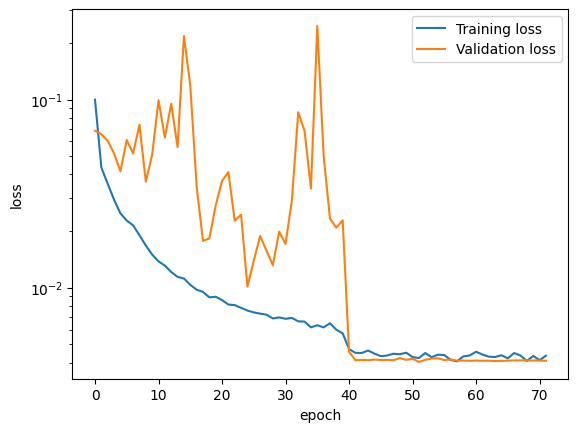

In [26]:
model = Sequential()
model.add(Dense(240, input_dim=16, activation='relu',kernel_regularizer=l2(0.00000000)))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))  
model.add(Dense(400, activation='relu',kernel_regularizer=l2(0.000001)))
model.add(BatchNormalization())
model.add(Dropout(0.1)) 

# model.add(Dense(456, activation='relu',kernel_regularizer=l2(0.00001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.15))

model.add(Dense(550, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.000000)))
model.add(BatchNormalization())
model.add(Dense(201))

model.compile(loss='mean_squared_error', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=200, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])           
                    
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
# combined_data = np.column_stack((history.history['loss'], history.history['val_loss'],history.history['learning_rate']))
# np.savetxt('artaryinputbroad_valloss_learningrate.csv', combined_data, delimiter=',')

In [ ]:
# testing sets results
targets=targets_test
targets_pre=model.predict(inputs_test)
L=np.arange(start=1,stop=y_point+1,step=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


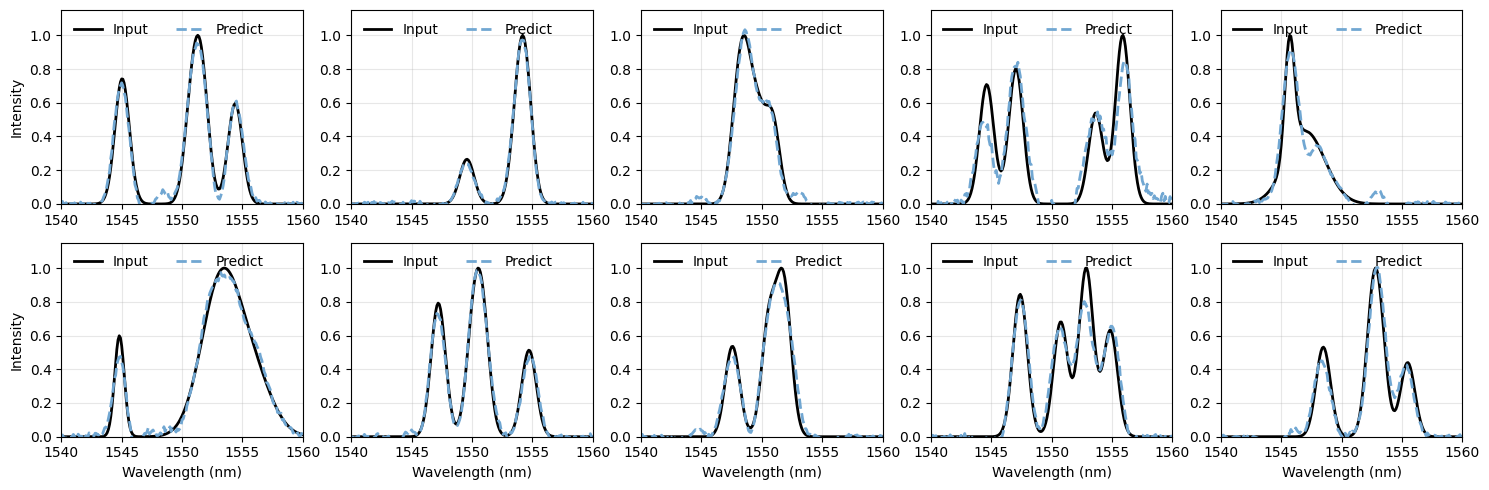

In [ ]:
wavelengths = np.linspace(1540, 1560, 201)

selected_indices = np.random.choice(len(targets), 10, replace=False)

saved_data = np.zeros((10, 2, 201))

# 存储数据
for i, idx in enumerate(selected_indices):
    saved_data[i, 0, :] = targets[idx]      # 实际光谱
    saved_data[i, 1, :] = targets_pre[idx]   # 预测光谱

# 可视化设置
plt.figure(figsize=(15, 5))

# 绘制2行5列子图
for i in range(10):
    plt.subplot(2, 5, i+1)
    # 绘制实际和预测曲线
    plt.plot(wavelengths, saved_data[i, 0], color=(0,0,0), label='Input', linewidth=2)
    plt.plot(wavelengths, saved_data[i, 1], color='#71A7D2', linestyle='--',label='Predict', linewidth=2)
    
    # 坐标轴设置
    plt.xlim(1540, 1560)
    plt.ylim(0, 1.15)
    plt.xticks(np.arange(1540, 1561, 5), rotation=0)
    plt.grid(alpha=0.3)
    plt.legend(loc='upper left', ncol=2, fontsize=10, frameon=True, framealpha=0)

    # 添加子图标签
    if i in [0, 5]: 
        plt.ylabel('Intensity')
    if i >=5:       
        plt.xlabel('Wavelength (nm)')
# 调整布局
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.savefig('spectra_comparison.png', dpi=600,  bbox_inches='tight')
plt.show()

In [53]:
combined_data = np.column_stack((saved_data[0,0,:], saved_data[0,1,:],saved_data[1,0,:], saved_data[1,1,:],saved_data[2,0,:], saved_data[2,1,:],saved_data[3,0,:], saved_data[3,1,:],saved_data[4,0,:], saved_data[4,1,:],saved_data[5,0,:], saved_data[5,1,:],saved_data[6,0,:], saved_data[6,1,:],saved_data[7,0,:], saved_data[7,1,:],saved_data[8,0,:], saved_data[8,1,:],saved_data[9,0,:], saved_data[9,1,:]))
np.savetxt('randgrouptargets_targets_pre.csv', combined_data, delimiter=',')